# SCPC2009 Analysis: Replicated with Python
### Incomplete Draft: 2017-10-30
---------------------------------
## Summary
In this notebook I present a first pass at replicating my Mobile Payment Adoption analysis (which can be found online at [the following GitHub repo](https://github.com/sedelmeyer/mobile-payment-adoption)) using popular Python data analysis libraries.

Presented below is a simplified version of the original Stata analysis, but using Python.

Due to the lack of a Rare Event Logit implementation in Python, I have built this initial draft analysis using the `statsmodels` Logit function.


## Backlog
Future iterations of this analysis will include additional classification models taken from the `sci-kit-learn` library, against which I will cross-validate models using training and testing data sets to evaluate the usefulness of each model (something which my original Mobile Payment Adoption analysis lacked).

#### Next Steps:
- Add variable descriptions via markdown tables
- Remove uncoded columns from subsetted data set
- Clean up data types in recoded data
- Expand data exploration and visualization
- Add predicted variable plots to logit analysis section
- Add train test for 2009 data, with associated confusion matrices
- Read and recode 2010 and 2011 survey data for additional test sets


# Notebook Contents

1. [Import Libraries](#libraries)

1. [Import and Subset Data](#data)

1. [Recode Variables](#recode)

    - [Payment Variables](#payment)
    - [Education Variables](#education)
    - [Income Variables](#income)
    - [Race Variables](#white)
    - [Age Variables](#Age)
   
1. [Explore Data](#explore)

1. [Logistic Regression](#logit)

<a id="libraries"></a>

# Import Libraries

In [1]:
# Disable Jupyter warnings for cleaner notebook presentation
import warnings
warnings.simplefilter('ignore')

In [2]:
# Display values of multiple statements per executed code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

<a id="data"></a>
# Import and Subset Data

In [4]:
SCPC = pd.read_csv('SCPC2009.csv')
SCPC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Columns: 1650 entries, Unnamed: 0 to rating_security
dtypes: float64(1377), int64(255), object(18)
memory usage: 27.4+ MB


### Subset SCPC data frame with variables of interest

In [5]:
SCPC = SCPC[['r_weight','pa051_a','pa051_b','pa027_a',
              'pa027_b','pa027_c','pa027_d','pa027_e',
              'pa026','age','edu_lhs','edu_hs','edu_sc',
              'edu_c','edu_pgs','inc_lt25','inc_2549',
              'inc_5074','inc_7599','inc_100124','inc_125199',
              'inc_gt200','white']]
SCPC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 23 columns):
r_weight      2173 non-null float64
pa051_a       1974 non-null float64
pa051_b       1975 non-null float64
pa027_a       2158 non-null float64
pa027_b       2157 non-null float64
pa027_c       2157 non-null float64
pa027_d       2158 non-null float64
pa027_e       2157 non-null float64
pa026         1888 non-null float64
age           2172 non-null float64
edu_lhs       2173 non-null int64
edu_hs        2173 non-null int64
edu_sc        2173 non-null int64
edu_c         2173 non-null int64
edu_pgs       2173 non-null int64
inc_lt25      2167 non-null float64
inc_2549      2167 non-null float64
inc_5074      2167 non-null float64
inc_7599      2167 non-null float64
inc_100124    2167 non-null float64
inc_125199    2167 non-null float64
inc_gt200     2167 non-null float64
white         2173 non-null int64
dtypes: float64(17), int64(6)
memory usage: 390.5 KB


In [6]:
SCPC.describe()

,r_weight,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026,age,...,edu_c,edu_pgs,inc_lt25,inc_2549,inc_5074,inc_7599,inc_100124,inc_125199,inc_gt200,white
count,2173.000000,1974.000000,1975.000000,2158.000000,2157.000000,2157.000000,2158.000000,2157.000000,1888.000000,2172.000000,...,2173.00000,2173.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2173.000000
mean,45.897377,1.983283,1.991392,1.904541,1.924896,1.986555,1.899444,1.980529,1.902542,50.891805,...,0.26277,0.207547,0.135210,0.257960,0.251038,0.157360,0.072912,0.085371,0.040148,0.876208
std,57.027656,0.128243,0.092400,0.293916,0.263621,0.115195,0.300810,0.138207,0.296658,14.206991,...,0.44024,0.405644,0.342027,0.437613,0.433711,0.364224,0.260052,0.279498,0.196351,0.329420
min,10.189878,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.266010,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,41.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26.607519,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,52.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.907169,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,61.000000,...,1.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,776.699219,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,90.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
SCPC.head()

,r_weight,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026,age,...,edu_c,edu_pgs,inc_lt25,inc_2549,inc_5074,inc_7599,inc_100124,inc_125199,inc_gt200,white
0,48.407444,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,56.0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,19.693514,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,64.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,27.521273,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,70.0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,21.771318,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,63.0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,12.004013,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,52.0,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


<a id="recode"></a>

## Recode Variables

### Recode "Payment" variables and delete null value observations

| col    | variable |  Description
|:-------|:---------|:-------------
|pa051_a |
|pa051_b |
|pa027_a |
|pa027_b |
|pa027_c |
|pa027_d |
|pa027_e |
|pa026   | 

In [8]:
pa_col_list = ['pa051_a','pa051_b','pa027_a','pa027_b',
               'pa027_c','pa027_d','pa027_e', 'pa026']

In [9]:
# Count null values per variable
SCPC[pa_col_list].isnull().sum()

pa051_a    199
pa051_b    198
pa027_a     15
pa027_b     16
pa027_c     16
pa027_d     15
pa027_e     16
pa026      285
dtype: int64

In [10]:
# Count response values per variable
#     2 = No
#     1 = Yes
SCPC[pa_col_list].apply(pd.Series.value_counts)

,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026
2.0,1941,1958,1952,1995,2128,1941,2115,1704
1.0,33,17,206,162,29,217,42,184


In [11]:
# Delete null observations
# Recode 'No' response from 2 to 0
for i in pa_col_list:
    SCPC[i].replace(2,0,inplace=True)
    SCPC.dropna(subset=[i],inplace=True)

In [12]:
# Summarize response count with null observations deleted
SCPC[pa_col_list].apply(pd.Series.value_counts)

,pa051_a,pa051_b,pa027_a,pa027_b,pa027_c,pa027_d,pa027_e,pa026
0.0,1850,1863,1699,1735,1855,1681,1839,1697
1.0,28,15,179,143,23,197,39,181


In [13]:
# Confirm removal of all null observations
SCPC[pa_col_list].isnull().sum()

pa051_a    0
pa051_b    0
pa027_a    0
pa027_b    0
pa027_c    0
pa027_d    0
pa027_e    0
pa026      0
dtype: int64

### Combine payment variables by type (Mobile vs Contactless) and add value labels

In [14]:
# Consolidate mobile payment variables and inspect repsonse counts
SCPC['MPay'] = SCPC['pa051_a'] + SCPC['pa051_b']
SCPC['MPay'].value_counts()

0.0    1838
1.0      37
2.0       3
Name: MPay, dtype: int64

In [15]:
# Recode all mobile payment "yes" responses to 1
SCPC['MPay'].replace(to_replace=2,value=1,inplace=True)
SCPC['MPay_label'] = SCPC['MPay'].replace(to_replace=[0,1],
                                          value=['No','Yes'])

print(SCPC['MPay'].value_counts())
print(SCPC['MPay_label'].value_counts())

0.0    1838
1.0      40
Name: MPay, dtype: int64
No     1838
Yes      40
Name: MPay_label, dtype: int64


In [16]:
# Consolidate contactless payment variables
SCPC['CPay'] = SCPC['pa027_a'] + SCPC['pa027_b'] + SCPC[
    'pa027_c'] + SCPC['pa027_d'] + SCPC['pa027_e']

SCPC['CPay'].value_counts()

0.0    1439
1.0     333
2.0      80
3.0      21
5.0       5
Name: CPay, dtype: int64

In [17]:
# Recode all contactless payment "yes" responses to 1
SCPC.loc[SCPC['CPay'] >= 1, 'CPay'] = 1
SCPC['CPay_label'] = SCPC['CPay'].replace(to_replace=[0,1],
                                          value=['No','Yes'])

print(SCPC['CPay'].value_counts())
print(SCPC['CPay_label'].value_counts())

0.0    1439
1.0     439
Name: CPay, dtype: int64
No     1439
Yes     439
Name: CPay_label, dtype: int64


### Duplicate Mobile Banking variable and add value labels

In [18]:
SCPC['MBank'] = SCPC['pa026']
SCPC['MBank_label'] = SCPC['MBank'].replace(to_replace=[0,1],
                                            value=['No','Yes'])
print(SCPC['MBank'].value_counts())
print(SCPC['MBank_label'].value_counts())

0.0    1697
1.0     181
Name: MBank, dtype: int64
No     1697
Yes     181
Name: MBank_label, dtype: int64


<a id="education"></a>

### Recode and combine Education Level variables and create value labels

In [19]:
ed_col_list = ['edu_lhs','edu_hs','edu_sc','edu_c','edu_pgs']

In [20]:
# Create 'EdLevel' column
SCPC['EdLevel'] = 0

# Recode and print response counts for each ed_col_list variable
# based on education levels 1-5
for i in ed_col_list:
    SCPC.loc[SCPC[i] == 1,i] = ed_col_list.index(i) + 1
    print(SCPC[i].value_counts())

0    1848
1      30
Name: edu_lhs, dtype: int64
0    1619
2     259
Name: edu_hs, dtype: int64
0    1211
3     667
Name: edu_sc, dtype: int64
0    1361
4     517
Name: edu_c, dtype: int64
0    1473
5     405
Name: edu_pgs, dtype: int64


In [21]:
# Consolidate ed_col_list variables into single EdLevel column
for i in ed_col_list:
    SCPC['EdLevel'] = SCPC['EdLevel'] + SCPC[i]
    
# Confirm results
SCPC['EdLevel'].value_counts().sort_index()

1     30
2    259
3    667
4    517
5    405
Name: EdLevel, dtype: int64

In [22]:
# Create corresponding EdLevel value descriptions
SCPC['EdLevel_label'] = SCPC['EdLevel'].replace(
    to_replace=[1,2,3,4,5],
    value=['Less than High School','High School',
           'Some College','College','Post-graduate Studies'])

# Confirm results
SCPC['EdLevel_label'].value_counts()

Some College             667
College                  517
Post-graduate Studies    405
High School              259
Less than High School     30
Name: EdLevel_label, dtype: int64

<a id="income"></a>

### Recode and combine Income Level variables and create value labels

In [23]:
inc_col_list = ['inc_lt25','inc_2549','inc_5074','inc_7599',
                'inc_100124','inc_125199','inc_gt200']

In [24]:
# Recode and print response counts for each inc_col_list variable
# based on income levels 1-7
for i in inc_col_list:
    SCPC.loc[SCPC[i] == 1,i] = inc_col_list.index(i) + 1
    SCPC.dropna(subset=[i],inplace=True)
    print(SCPC[i].value_counts())

0.0    1677
1.0     196
Name: inc_lt25, dtype: int64
0.0    1402
2.0     471
Name: inc_2549, dtype: int64
0.0    1390
3.0     483
Name: inc_5074, dtype: int64
0.0    1559
4.0     314
Name: inc_7599, dtype: int64
0.0    1726
5.0     147
Name: inc_100124, dtype: int64
0.0    1697
6.0     176
Name: inc_125199, dtype: int64
0.0    1787
7.0      86
Name: inc_gt200, dtype: int64


In [25]:
# Confirm no null value counts
SCPC[inc_col_list].isnull().sum()

inc_lt25      0
inc_2549      0
inc_5074      0
inc_7599      0
inc_100124    0
inc_125199    0
inc_gt200     0
dtype: int64

In [26]:
# Consolidate all inc_col_list variables into single column
SCPC['IncLevel'] = 0

for i in inc_col_list:
    SCPC['IncLevel'] = SCPC['IncLevel'] + SCPC[i]
    
SCPC['IncLevel'].value_counts().sort_index()

1.0    196
2.0    471
3.0    483
4.0    314
5.0    147
6.0    176
7.0     86
Name: IncLevel, dtype: int64

In [27]:
# Create corresponding income level category names
SCPC['IncLevel_label'] = SCPC['IncLevel'].replace(
    {1:"Less than $25,000",
     2:"$25,000-$49,999 per year",
     3:"$50,000-$74,999 per year",
     4:"$75,000-$99,999 per year",
     5:"$100,000-$124,999 per year",
     6:"$125,000-$199,999 per year",
     7:"Greater than $200,000 per year"})

SCPC['IncLevel_label'].apply(str)
SCPC['IncLevel_label'].value_counts().sort_index()

0                    Less than $25,000
1             $25,000-$49,999 per year
2             $25,000-$49,999 per year
3           $100,000-$124,999 per year
4             $75,000-$99,999 per year
5       Greater than $200,000 per year
6             $25,000-$49,999 per year
8                    Less than $25,000
9             $25,000-$49,999 per year
10          $125,000-$199,999 per year
11            $25,000-$49,999 per year
12            $25,000-$49,999 per year
13            $50,000-$74,999 per year
14            $75,000-$99,999 per year
15            $75,000-$99,999 per year
16            $75,000-$99,999 per year
17                   Less than $25,000
18            $25,000-$49,999 per year
19            $75,000-$99,999 per year
20          $100,000-$124,999 per year
21            $50,000-$74,999 per year
23          $125,000-$199,999 per year
24            $50,000-$74,999 per year
25          $100,000-$124,999 per year
26          $125,000-$199,999 per year
27      Greater than $200

$100,000-$124,999 per year        147
$125,000-$199,999 per year        176
$25,000-$49,999 per year          471
$50,000-$74,999 per year          483
$75,000-$99,999 per year          314
Greater than $200,000 per year     86
Less than $25,000                 196
Name: IncLevel_label, dtype: int64

<a id="white"></a>
### White variable create label column

In [28]:
# Confirm no null values
SCPC['white'].isnull().sum()

0

In [29]:
SCPC['white_label'] = SCPC['white'].replace({0:'No',1:'Yes'})

In [30]:
print(SCPC['white'].value_counts())
print(SCPC['white_label'].value_counts())

1    1663
0     210
Name: white, dtype: int64
Yes    1663
No      210
Name: white_label, dtype: int64


<a id="age"></a>
### Recode Age variable and delete null values

In [31]:
SCPC.dropna(subset=['age'],inplace=True)
SCPC['age'].isnull().sum()

0

In [32]:
# Recode age categories
SCPC['AgeLevel'] = pd.cut(SCPC['age'],
                          bins=[0,24,34,44,54,64,100],
                          labels=[1,2,3,4,5,6])
SCPC['AgeLevel'].value_counts().sort_index()

1     83
2    195
3    279
4    554
5    474
6    287
Name: AgeLevel, dtype: int64

In [33]:
# Create age category labels
SCPC['AgeLevel_label'] = SCPC['AgeLevel'].replace(
    {1:"Less than 25 years",
     2:"25-34 years",
     3:"35-44 years",
     4:"45-54 years",
     5:"55-64 years",
     6:"More than 65"})

SCPC['AgeLevel_label'].value_counts().sort_index()

25-34 years           195
35-44 years           279
45-54 years           554
55-64 years           474
Less than 25 years     83
More than 65          287
Name: AgeLevel_label, dtype: int64

In [34]:
# Confirm results
SCPC[['age','AgeLevel','AgeLevel_label']].head()

,age,AgeLevel,AgeLevel_label
0,56.0,5,55-64 years
1,64.0,5,55-64 years
2,70.0,6,More than 65
3,63.0,5,55-64 years
4,52.0,4,45-54 years


<a id="explore"></a>
## Visualize Variables

In [35]:
# Subset coded variables with CPay and MBank included
coded_variables = ['MPay','CPay','MBank','age',
                   'EdLevel','IncLevel','white']

df1 = SCPC[coded_variables]
df1['intercept']=1.0
df1.head()
df1.describe()
df1.info()

,MPay,CPay,MBank,age,EdLevel,IncLevel,white,intercept
0,0.0,0.0,0.0,56.0,2,1.0,1,1.0
1,0.0,0.0,0.0,64.0,3,2.0,1,1.0
2,0.0,1.0,1.0,70.0,3,2.0,1,1.0
3,0.0,0.0,0.0,63.0,3,5.0,1,1.0
4,0.0,0.0,0.0,52.0,5,4.0,1,1.0


,MPay,CPay,MBank,age,EdLevel,IncLevel,white,intercept
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.0
mean,0.021368,0.233974,0.096688,50.544872,3.536859,3.327457,0.887821,1.0
std,0.144645,0.423469,0.295611,13.869789,1.025453,1.618352,0.315671,0.0
min,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,41.000000,3.000000,2.000000,1.000000,1.0
50%,0.000000,0.000000,0.000000,52.000000,3.000000,3.000000,1.000000,1.0
75%,0.000000,0.000000,0.000000,60.000000,4.000000,4.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,89.000000,5.000000,7.000000,1.000000,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 2172
Data columns (total 8 columns):
MPay         1872 non-null float64
CPay         1872 non-null float64
MBank        1872 non-null float64
age          1872 non-null float64
EdLevel      1872 non-null int64
IncLevel     1872 non-null float64
white        1872 non-null int64
intercept    1872 non-null float64
dtypes: float64(6), int64(2)
memory usage: 131.6 KB


In [36]:
# Subset coded variables without CPay and MBank included
coded_variables2 = ['MPay','age','EdLevel',
                    'IncLevel','white']

df2 = SCPC[coded_variables2]
df2['intercept']=1.0
df2.head()
df2.describe()
df2.info()

,MPay,age,EdLevel,IncLevel,white,intercept
0,0.0,56.0,2,1.0,1,1.0
1,0.0,64.0,3,2.0,1,1.0
2,0.0,70.0,3,2.0,1,1.0
3,0.0,63.0,3,5.0,1,1.0
4,0.0,52.0,5,4.0,1,1.0


,MPay,age,EdLevel,IncLevel,white,intercept
count,1872.000000,1872.000000,1872.000000,1872.000000,1872.000000,1872.0
mean,0.021368,50.544872,3.536859,3.327457,0.887821,1.0
std,0.144645,13.869789,1.025453,1.618352,0.315671,0.0
min,0.000000,18.000000,1.000000,1.000000,0.000000,1.0
25%,0.000000,41.000000,3.000000,2.000000,1.000000,1.0
50%,0.000000,52.000000,3.000000,3.000000,1.000000,1.0
75%,0.000000,60.000000,4.000000,4.000000,1.000000,1.0
max,1.000000,89.000000,5.000000,7.000000,1.000000,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 2172
Data columns (total 6 columns):
MPay         1872 non-null float64
age          1872 non-null float64
EdLevel      1872 non-null int64
IncLevel     1872 non-null float64
white        1872 non-null int64
intercept    1872 non-null float64
dtypes: float64(4), int64(2)
memory usage: 102.4 KB


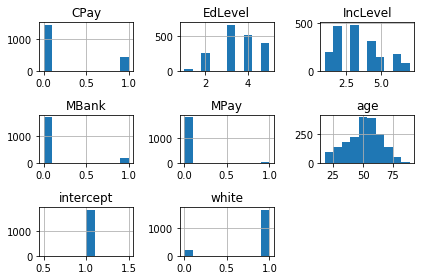

In [37]:
df1.hist()
plt.tight_layout();

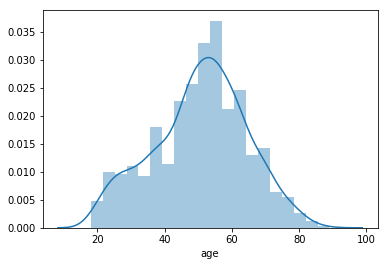

In [38]:
sns.distplot(SCPC['age'],bins=20);

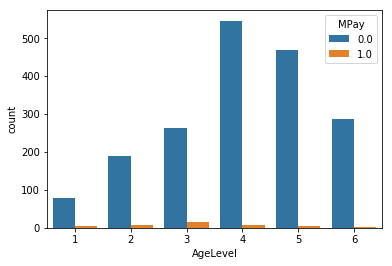

In [39]:
sns.countplot(x=SCPC['AgeLevel'],hue=SCPC['MPay']);

<a id="logit"></a>
# Perform Logistic Regression

In [40]:
train_cols1 = df1.columns[1:]
train_cols1

Index(['CPay', 'MBank', 'age', 'EdLevel', 'IncLevel', 'white', 'intercept'], dtype='object')

In [41]:
train_cols2 = df2.columns[1:]
train_cols2

Index(['age', 'EdLevel', 'IncLevel', 'white', 'intercept'], dtype='object')

In [42]:
logit1 = sm.Logit(df1['MPay'],df1[train_cols1])

In [43]:
result1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.082429
         Iterations 9


In [44]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   MPay   No. Observations:                 1872
Model:                          Logit   Df Residuals:                     1865
Method:                           MLE   Df Model:                            6
Date:                Mon, 30 Oct 2017   Pseudo R-squ.:                  0.2022
Time:                        21:14:47   Log-Likelihood:                -154.31
converged:                       True   LL-Null:                       -193.40
                                        LLR p-value:                 8.423e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CPay           1.7159      0.358      4.791      0.000       1.014       2.418
MBank          1.7573      0.362      4.852      0.000       1.047       2.467
age           -0.0249      0.013     -1.957      0.050      -0.050    3.51e-05
EdLevel       -0.3160      0.191     -1.650      0.099      -0.691       0.059
IncLevel      -0.0306      0.117     -0.262      0.794      -0.260       0.199
white         -0.4170      0.405     -1.028      0.304      -1.212       0.378
intercept     -2.3350      0.853     -2.737      0.006      -4.007      -0.663
==============================================================================
"""

In [45]:
result1.conf_int()

,0,1
CPay,1.014018,2.417835
MBank,1.047441,2.467204
age,-0.049821,0.000035
EdLevel,-0.691321,0.059299
IncLevel,-0.259736,0.198562
white,-1.211561,0.377656
intercept,-4.007125,-0.662915


In [46]:
logit2 = sm.Logit(df2['MPay'],df2[train_cols2])

In [47]:
result2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.096257
         Iterations 9


In [48]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   MPay   No. Observations:                 1872
Model:                          Logit   Df Residuals:                     1867
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Oct 2017   Pseudo R-squ.:                 0.06832
Time:                        21:14:51   Log-Likelihood:                -180.19
converged:                       True   LL-Null:                       -193.40
                                        LLR p-value:                 2.598e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0454      0.012     -3.744      0.000      -0.069      -0.022
EdLevel       -0.3068      0.178     -1.728      0.084      -0.655       0.041
IncLevel       0.0794      0.111      0.713      0.476      -0.139       0.298
white         -0.8245      0.378     -2.182      0.029      -1.565      -0.084
intercept     -0.2916      0.741     -0.394      0.694      -1.744       1.160
==============================================================================
"""